In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


In [2]:

rainfall_data_matrix = pd.read_csv('D:/deep learning/pune_1965_to_2002.csv')
rainfall_data_matrix.set_index('Year', inplace=True)
rainfall_data_matrix = rainfall_data_matrix.transpose()
rainfall_data_matrix

Year,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,...,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002
Jan,0.029,0.905,0.248,0.318,0.248,0.070,0.000,0.000,0.000,0.000,...,0.000,0.879,0.695,0.016,1.284,0.008,0.000,0.000,0.147,0.231
Feb,0.069,0.000,3.390,3.035,2.524,0.000,0.000,0.029,2.969,0.000,...,0.078,0.325,0.000,2.779,0.000,2.671,1.431,0.170,0.000,0.911
Mar,0.000,0.000,1.320,1.704,0.334,0.001,0.000,0.000,0.234,6.427,...,1.211,2.415,1.770,0.087,0.747,0.073,0.000,0.000,2.178,0.388
Apr,21.667,2.981,13.482,23.307,4.569,16.218,0.812,5.982,3.925,16.864,...,2.062,16.823,25.949,6.318,23.912,0.377,0.642,1.193,1.528,53.266
May,17.859,63.008,11.116,7.441,6.213,68.036,57.691,19.101,14.978,51.209,...,3.248,33.378,23.964,5.134,4.664,15.717,35.828,26.237,7.860,18.430
Jun,102.111,94.088,251.314,179.872,393.682,300.546,297.187,132.413,304.484,148.697,...,234.068,749.030,163.515,453.607,673.831,238.609,415.471,371.328,247.982,509.145
Jul,606.071,481.942,780.006,379.354,678.354,330.502,122.195,338.484,696.024,405.359,...,450.088,707.986,501.461,558.586,422.913,590.663,277.137,265.417,279.547,84.936
Aug,402.521,59.386,181.069,171.979,397.335,283.476,372.693,68.741,256.932,319.651,...,150.278,230.898,114.206,212.489,541.579,362.357,98.616,220.814,189.404,257.205
Sep,69.511,150.624,183.757,219.884,205.413,158.640,286.056,120.415,183.206,288.533,...,101.928,115.509,288.262,203.642,60.477,243.444,225.962,147.196,158.025,78.269
Oct,5.249,1.308,50.404,73.997,24.014,115.758,39.424,1.078,101.805,188.876,...,225.904,116.348,84.359,176.471,31.050,96.324,180.300,38.246,135.518,21.486


In [3]:
dates = pd.date_range(start='1965-01', freq='MS', periods=len(rainfall_data_matrix.columns)*12)

dates


DatetimeIndex(['1965-01-01', '1965-02-01', '1965-03-01', '1965-04-01',
               '1965-05-01', '1965-06-01', '1965-07-01', '1965-08-01',
               '1965-09-01', '1965-10-01',
               ...
               '2002-03-01', '2002-04-01', '2002-05-01', '2002-06-01',
               '2002-07-01', '2002-08-01', '2002-09-01', '2002-10-01',
               '2002-11-01', '2002-12-01'],
              dtype='datetime64[ns]', length=456, freq='MS')

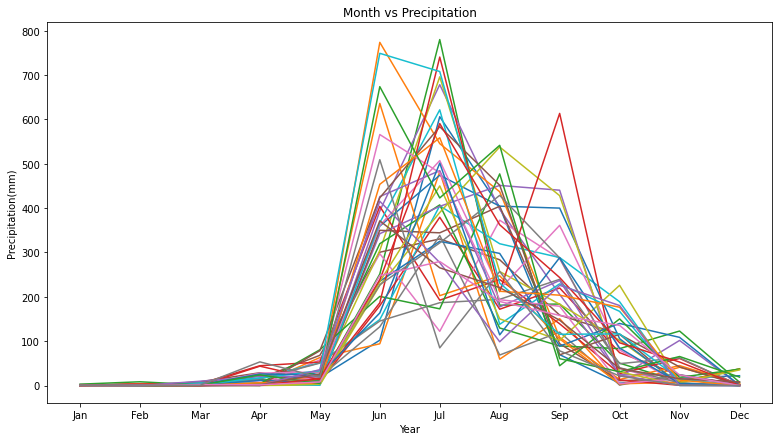

In [4]:
plt.figure(figsize=(13,7))
plt.plot(rainfall_data_matrix)
plt.xlabel('Year')
plt.ylabel('Precipitation(mm)')
plt.title('Month vs Precipitation')
plt.show()

Text(0.5, 1.0, 'Month vs Precipitation across all years')

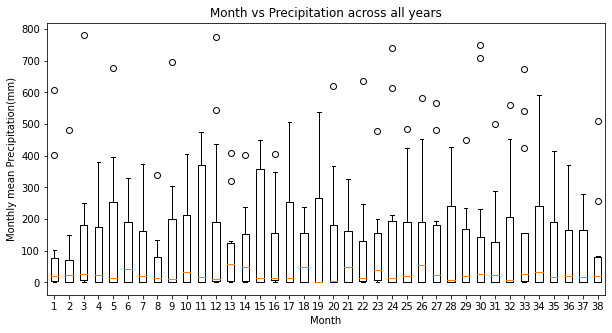

In [5]:
plt.figure(figsize=(10,5))
plt.boxplot(rainfall_data_matrix)
plt.xlabel('Month')
plt.ylabel('Monthly mean Precipitation(mm)')
plt.title('Month vs Precipitation across all years')


In [6]:
rainfall_data_matrix_np = rainfall_data_matrix.transpose().values

shape = rainfall_data_matrix_np.shape
rainfall_data_matrix_np = rainfall_data_matrix_np.reshape((shape[0] * shape[1], 1))

In [7]:


rainfall_data = pd.DataFrame({'Precipitation': rainfall_data_matrix_np[:,0]})
rainfall_data.set_index(dates, inplace=True)

test_rainfall_data = rainfall_data.iloc[360:456]
rainfall_data = rainfall_data.iloc[0:360]
rainfall_data.head()

,Precipitation
1965-01-01,0.029
1965-02-01,0.069
1965-03-01,0.000
1965-04-01,21.667
1965-05-01,17.859


Text(0.5, 1.0, 'Precipitation in mm')

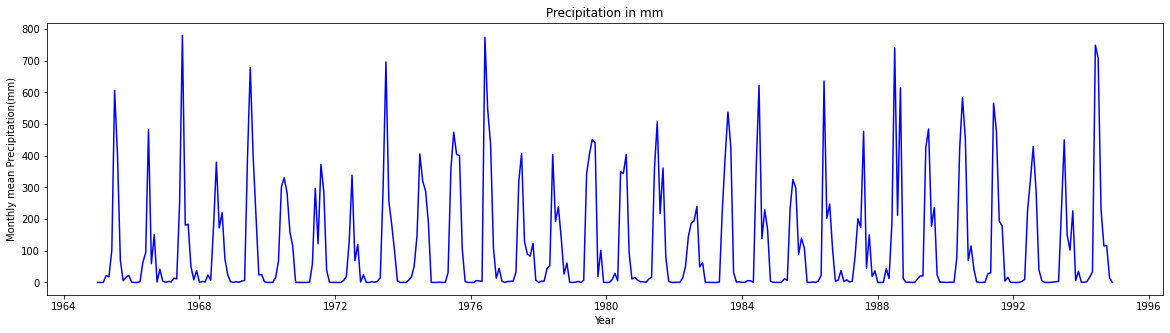

In [8]:
plt.figure(figsize=(20,5))
plt.plot(rainfall_data, color='blue')
plt.xlabel('Year')
plt.ylabel('Monthly mean Precipitation(mm)')
plt.title('Precipitation in mm')


In [9]:
scaler = MinMaxScaler(feature_range=(0, 1))

train_data = scaler.fit_transform(rainfall_data)
test_data = scaler.fit_transform(test_rainfall_data)

In [10]:
rainfall_data.head()


,Precipitation
1965-01-01,0.029
1965-02-01,0.069
1965-03-01,0.000
1965-04-01,21.667
1965-05-01,17.859


In [11]:
train_data[:5]


array([[3.71792012e-05],
       [8.84608580e-05],
       [0.00000000e+00],
       [2.77779915e-02],
       [2.28959777e-02]])

In [12]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []

    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    
    return np.array(dataX), np.array(dataY)

In [13]:
look_back = 3
trainX, trainY = create_dataset(train_data, look_back)
testX, testY = create_dataset(test_data, look_back)

In [14]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [15]:
print("Shape of train input: " + str(trainX.shape))
print("Shape of train labels: " + str(trainY.shape))
print("Shape of test input: " + str(testX.shape))
print("Shape of test labels: " + str(testY.shape))

Shape of train input: (356, 1, 3)
Shape of train labels: (356,)
Shape of test input: (92, 1, 3)
Shape of test labels: (92,)


In [16]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')


In [17]:
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)


Epoch 1/100
356/356 - 2s - loss: 0.0545
Epoch 2/100
356/356 - 2s - loss: 0.0462
Epoch 3/100
356/356 - 2s - loss: 0.0427
Epoch 4/100
356/356 - 2s - loss: 0.0398
Epoch 5/100
356/356 - 2s - loss: 0.0375
Epoch 6/100
356/356 - 3s - loss: 0.0360
Epoch 7/100
356/356 - 2s - loss: 0.0352
Epoch 8/100
356/356 - 2s - loss: 0.0347
Epoch 9/100
356/356 - 2s - loss: 0.0344
Epoch 10/100
356/356 - 2s - loss: 0.0340
Epoch 11/100
356/356 - 2s - loss: 0.0337
Epoch 12/100
356/356 - 2s - loss: 0.0337
Epoch 13/100
356/356 - 2s - loss: 0.0335
Epoch 14/100
356/356 - 3s - loss: 0.0330
Epoch 15/100
356/356 - 3s - loss: 0.0328
Epoch 16/100
356/356 - 2s - loss: 0.0328
Epoch 17/100
356/356 - 2s - loss: 0.0324
Epoch 18/100
356/356 - 2s - loss: 0.0323
Epoch 19/100
356/356 - 2s - loss: 0.0321
Epoch 20/100
356/356 - 2s - loss: 0.0318
Epoch 21/100
356/356 - 3s - loss: 0.0315
Epoch 22/100
356/356 - 2s - loss: 0.0316
Epoch 23/100
356/356 - 2s - loss: 0.0314
Epoch 24/100
356/356 - 2s - loss: 0.0310
Epoch 25/100
356/356 - 2s

In [18]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [19]:
testPredict[:5]


array([[0.07110929],
       [0.15610068],
       [0.13826975],
       [0.42304397],
       [0.41353732]], dtype=float32)

In [20]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [21]:
dates = pd.date_range(start='1965-04', freq='MS', periods=trainY.shape[1])

In [22]:
trainActual = pd.DataFrame({'Precipitation': trainY[0]})
trainActual.index = dates

trainPredictdf = pd.DataFrame({'Precipitation': trainPredict[:,0]})
trainPredictdf.index = dates

In [44]:
print(len(test_rainfall_data))
print(test_rainfall_data.index[0])

96
1995-01-01 00:00:00


In [48]:

testDates = pd.date_range(start='1995-01',end ='2002-08', freq='MS')
freq = 'D'
testDates = testDates+ pd.Timedelta(3,unit = freq)
print(len(testDates))

92


In [49]:
testActual = pd.DataFrame({'Precipitation': testY[0]})
testActual.index = testDates

testPredictdf = pd.DataFrame({'Precipitation': testPredict[:,0]})
testPredictdf.index = testDates

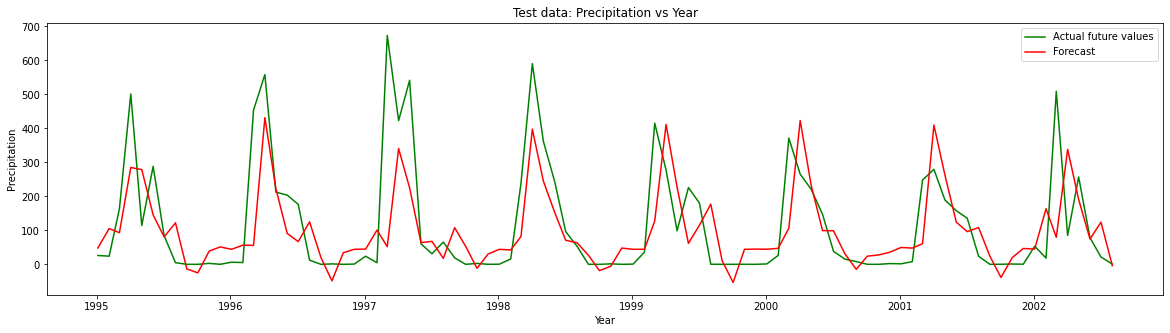

In [50]:
plt.figure(figsize=(20,5))
plt.plot(testActual, color='green', label='Actual future values')
plt.plot(testPredictdf, color='red', label='Forecast')
plt.title('Test data: Precipitation vs Year')
plt.xlabel('Year')
plt.ylabel('Precipitation')
plt.legend(loc='best')